Importing the data using Pandas library and understanding summary statistics

In [154]:
import pandas as pd

data=pd.read_csv('C:/Users/anuj/Documents/Anuj/MMA/Maching Learning & AI/Practice Files/Mall_Customers.csv',index_col='CustomerID')

data.head()

data.tail()

data.describe()





,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


Understanding if there is any missing data!

In [155]:
pd.isnull(data)


,Genre,Age,AnnualIncome,SpendingScore
CustomerID,,,,
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
...,...,...,...,...
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


Generating dummy features for Genre feature as KMeans do not support categorical variables

In [156]:
Genre_dummy=pd.get_dummies(data['Genre'])

Genre_dummy


,Female,Male
CustomerID,,
1,0,1
2,0,1
3,1,0
4,1,0
5,1,0
...,...,...
196,1,0
197,1,0
198,0,1


In [157]:
data=pd.concat([data,Genre_dummy],axis=1)

data


,Genre,Age,AnnualIncome,SpendingScore,Female,Male
CustomerID,,,,,,
1,Male,19,15,39,0,1
2,Male,21,15,81,0,1
3,Female,20,16,6,1,0
4,Female,23,16,77,1,0
5,Female,31,17,40,1,0
...,...,...,...,...,...,...
196,Female,35,120,79,1,0
197,Female,45,126,28,1,0
198,Male,32,126,74,0,1


Kmeans Algorithm with Elbow and Silhoutte Score plots


Number of clusters: 2 
Clustering: [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1
 1 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1
 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0] 
Inertia with 2 Clusters: 212938.7150895141 
Silhouette_score with 2 Clusters: 0.29298136996751367 
Centroids: [[28.95294118 62.17647059 73.62352941  0.55294118  0.44705882]
 [46.16521739 59.36521739 32.88695652  0.56521739  0.43478261]]

Number of clusters: 3 
Clustering: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0

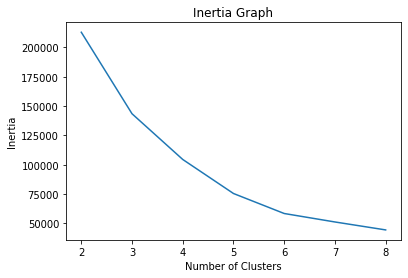

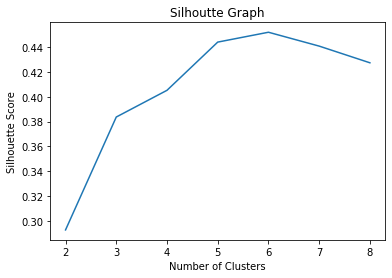

In [158]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

cluster=[]
Inertia=[]
silscore=[]

x=data[['Age','AnnualIncome','SpendingScore','Female','Male']].copy(deep=True)

for k in range(2,9):
    kmeans=KMeans(n_clusters=k,n_init=25)

    y_pred=kmeans.fit_predict(x)
    
    cluster.append(k)
    Inertia.append(kmeans.inertia_)
    
    silscore.append(silhouette_score(x,kmeans.labels_))

    
    print("\n"'Number of clusters:',k,"\n"'Clustering:',y_pred,"\n"'Inertia with',k,'Clusters:',kmeans.inertia_,"\n"
          'Silhouette_score with',k,'Clusters:',silhouette_score(x,kmeans.labels_),"\n"'Centroids:',kmeans.cluster_centers_) 
    


plt.plot(cluster,Inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia Graph')
plt.show()

plt.plot(cluster,silscore)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhoutte Graph')
plt.show()



Plotting the clusters with its centroids

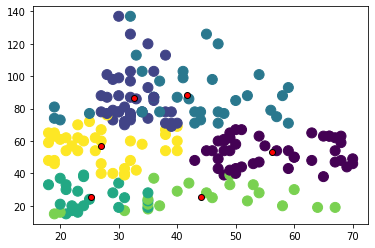

In [160]:
kmeans=KMeans(n_clusters=6,n_init=25)

y_pred=kmeans.fit(x)

plt.figure;
plt.scatter(x.iloc[:,0], x.iloc[:,1], s=100, c=y_pred.labels_)

plt.scatter(
    y_pred.cluster_centers_[:, 0], y_pred.cluster_centers_[:, 1],
    c='red', edgecolor='black',
    label='centroids'
)
